# Linear support vector machines classifier  

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification, make_blobs

# set default color map for entire notebook/session
sns.set_theme(style='whitegrid')

## Model  

Find the best hyperplane and assign signs  

`y = np.sign(np.dot(w, x) + b)`

## Loss function  

[Hinge loss](https://youtu.be/onOYSeX8idQ?t=152)  

`max(0, 1-t)`  
* It is equal to 0 when t >= 1.  
* It's derivative (slope) is equal to -1 if t < 1 and 0 if t >1.  
* It is not differentiable at t = 1.  

## Optimization procedure  

We will be using gradient descent procedure for optimization.  

## Soft SVM implementation  

[VIDEO LINK](https://youtu.be/onOYSeX8idQ?t=410)  

In [16]:
class softSVM:
    def __init__(self, C):
        self._support_vectors = None
        self.C = C
        self.w = None
        self.b = None
        self.X = None
        self.y = None

        # n is the number of data points
        self.n = 0

        # d is the number of dimensions 
        self.d = 0

    def __decision_function(self, X):
        return X.dot(self.w) + self.b

    def __cost(self, margin):
        return (1/2) * self.w.dot(self.w) + self.C * np.sum(
            np.maximum(0, 1- margin))

    def __margin(self, X, y):
        return y * self.__decision_function(X)

    def fit(self, X, y, lr=1e-3, epochs=500):
        # Initialize w and b
        self.n, self.d = X.shape
        self.w = np.random.randn(self.d)
        self.b = 0

        # Required only for plotting
        self.X = X
        self.y = y

        loss_array = []
        for _ in range(epochs):
            margin = self.__margin(X, y)
            loss = self.__cost(margin)
            loss_array.append(loss)

            misclassified_pts_idx = np.where(margin < 1)[0]
            d_w = self.w - self.C * y[misclassified_pts_idx].dot(
                X[misclassified_pts_idx])
            self.w = self.w - lr * d_w

            d_b = -self.C * np.sum(y[misclassified_pts_idx])
            self.b = self.b - lr * d_b

        self._support_vectors = np.where(
            self.__margin(X, y) <= self.__margin(X, y))[0]

    def predict(self, X):
        return np.sign(self.__decision_function(X))

    def score(self, X, y):
        P = self.predict(X)
        return np.mean(y = P)

    def plot_decision_boundary(self):
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y, marker='o',
                    s=100, cmap='autumn')
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        # create grid to evaluate model
        xx = np.linspace(xlim[0], xlim[1], 30)
        yy = np.linspace(ylim[0], ylim[1], 30)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = self.__decision_function(xy).reshape(XX.shape)

        # plot decision boundary and margins
        ax.contour(XX, YY, Z, colors=['g', 'k', 'g'], levels=[-1, 0, 1],
                    linestyles=['--', '-', '--'], linewidths=[2.0, 2.0, 2.0])

        # highlight the support vectors 
        ax.scatter(self.X[:, 0][self._support_vectors],
                    self.X[:, 1][self._support_vectors], s=250,
                    linewidth=1, facecolors='none', edgecolors='k')
        plt.xlabel('x1')
        plt.xlabel('x2')
        plt.show()

## Training data  

Let's first generate synthetic data with two classes.  

## Demo 1: Linearly separable data  

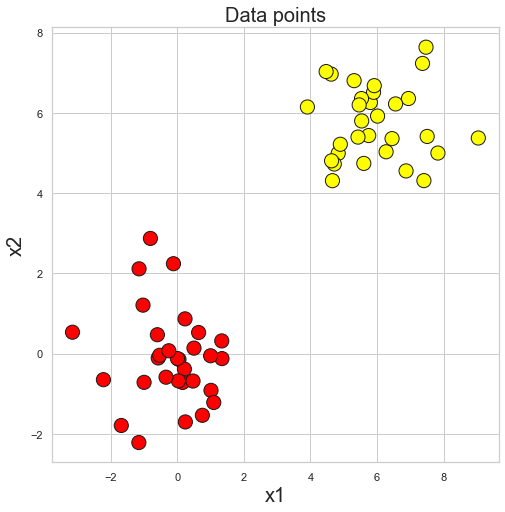

In [17]:
# generate artificial data points  
X, Y = make_blobs(n_samples=60, 
                    n_features=2,
                    centers=[[0,0], [6,6]],
                    cluster_std=1,
                    random_state=12)
Y = np.where(Y == 0, -1, 1)

# plot the two classes
plt.figure(figsize=(8,8))

plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, s=200, edgecolor='k', cmap='autumn')
plt.xlabel('x1', fontsize=20)
plt.ylabel('x2', fontsize=20)
plt.title('Data points', fontsize=20)
plt.show()

[0.31776831 0.24421875]


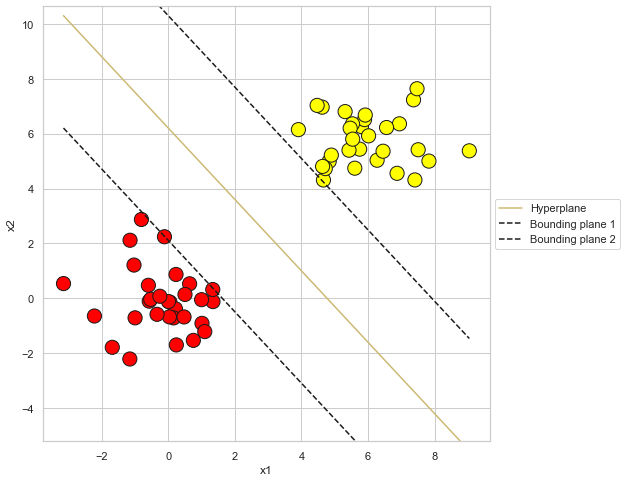

In [18]:
svm = softSVM(C=1)
svm.fit(X, Y)

print(svm.w)

def get_hyperplane_value(X, w, b, offset):
    return -1 * (w[0] * X + b + offset) / w[1]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, s=200, edgecolor='k', cmap='autumn')
x0_1 = np.amin(X[:, 0])
x0_2 = np.amax(X[:, 0])

x1_1 = get_hyperplane_value(x0_1, svm.w, svm.b, 0)
x1_2 = get_hyperplane_value(x0_2, svm.w, svm.b, 0)

x1_1_m = get_hyperplane_value(x0_1, svm.w, svm.b, -1)
x1_2_m = get_hyperplane_value(x0_2, svm.w, svm.b, -1)

x1_1_p = get_hyperplane_value(x0_1, svm.w, svm.b, 1)
x1_2_p = get_hyperplane_value(x0_2, svm.w, svm.b, 1)

ax.plot([x0_1, x0_2], [x1_1, x1_2], "y")
ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k--")
ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k--")

x1_min = np.amin(X[:, 1])
x1_max = np.amax(X[:, 1])
ax.set_ylim([x1_min - 3, x1_max + 3])
ax.legend(['Hyperplane', 'Bounding plane 1', 'Bounding plane 2'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Prediction of new example  

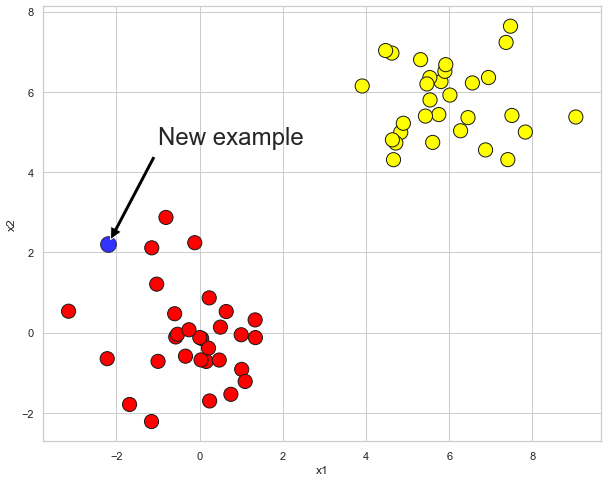

In [19]:
newExample = np.array([-2.2, 2.2])

plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, s=200, edgecolor='k', cmap='autumn')

plt.scatter(newExample[0], newExample[1], marker='o', c='blue',
            s=250, edgecolor='k', alpha=0.8)
plt.annotate('New example', xy=newExample,
                xytext=(50, 100), textcoords='offset points',
                arrowprops=dict(facecolor='black', shrink=0.05), fontsize=24)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [20]:
svm.predict(newExample)

-1.0

## Demo 2: Linearly separable with noise

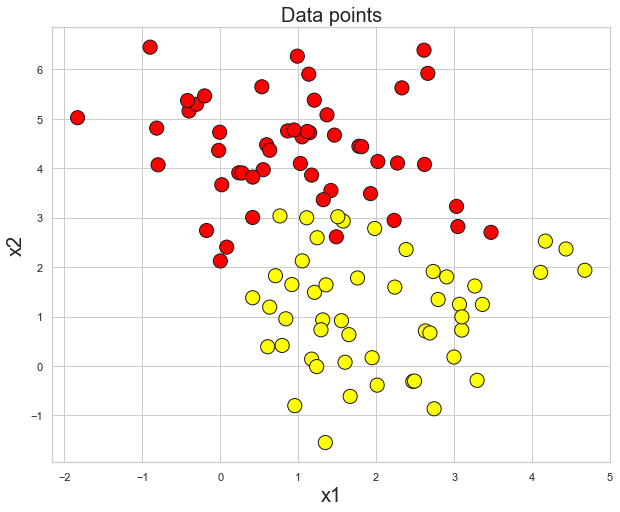

In [21]:
# necessary imports 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification, make_blobs

# set default color map for entire notebook/session
sns.set_theme(style='whitegrid')

X, y = make_blobs(n_samples=100, centers=2,
                    random_state=0, cluster_std=1.1)
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=200, edgecolor='k', cmap='autumn')
plt.xlabel('x1', fontsize=20)
plt.ylabel('x2', fontsize=20)
plt.title('Data points', fontsize=20)
plt.show()

[ 0.33460498 -1.57865337] 3.7300000000000093


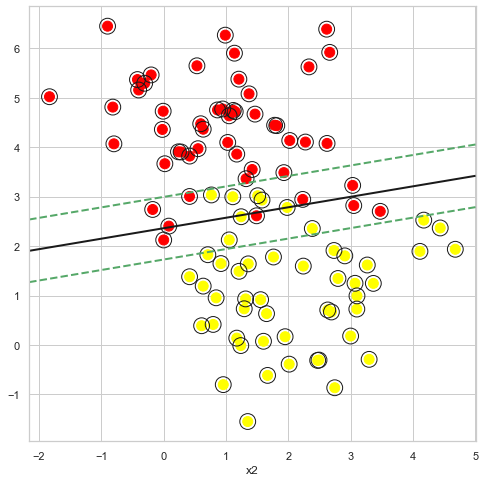

In [26]:
y[y == 0] = -1
svm = softSVM(C=10)     # Change C to 1, 100 etc to see what changes
svm.fit(X, y)

print(svm.w, svm.b)

fig = plt.figure(figsize=(8, 8))
svm.plot_decision_boundary()

## Demo 3: Linearly non-separable data

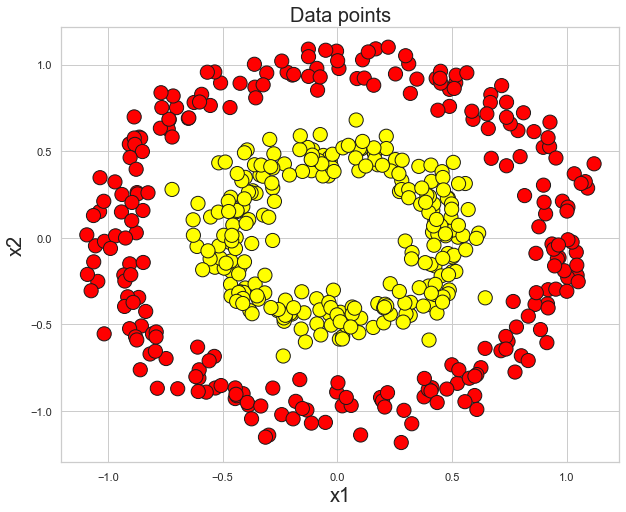

In [27]:
from sklearn.datasets import make_circles
X, y = make_circles(500, factor=0.5, noise=0.08)
y[y == 0] = -1

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=200, edgecolor='k', cmap='autumn')
plt.xlabel('x1', fontsize=20)
plt.ylabel('x2', fontsize=20)
plt.title('Data points', fontsize=20)
plt.show()

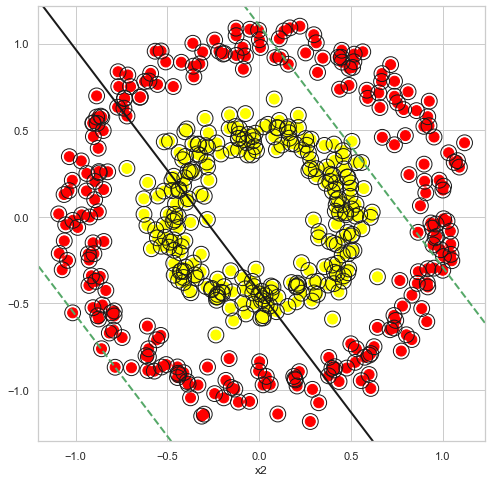

In [35]:
y[y == 0] = -1
svm = softSVM(C=10)     # Change C to 1, 100, 1000 etc to see what changes
svm.fit(X, y)

fig = plt.figure(figsize=(8, 8))
svm.plot_decision_boundary()

# Note that SVM is unable to learn decision boundary in this dataset

# Kernel SVM  

We will be implementing the dual problem of SVM by replacing the dot product between two feature vectors with the kernel function.  
The similarity of two points is calculated with a specific kernel function.  

The (Wolfe) dual problem of SVM is a concave problem that is maximized using a solver.  

In [42]:
class SVMDualProblem:
    def __init__(self, C=1.0, kernel='rbf', sigma=0.1, degree=2):
        self.C = C
        if kernel == 'poly':
            self.kernel = self._polynomial_kernel
            self.c = 1
            self.degree = degree
        else:
            self.kernel = self._rbf_kernel
            self.sigma = sigma

        self.X = None
        self.y = None
        self.alpha = None
        self.b = 0
        self.ones = None

    def _rbf_kernel(self, X1, X2):
        return np.exp(-(1 / self.sigma ** 2) * np.linalg.norm(
            X1[:, np.newaxis] - X2[np.newaxis, :], axis=2) ** 2)
        
    def _polynomial_kernel(self, X1, X2):
        return (self.c + X1.dot(X2.T)) ** self.degree

    def fit(self, X, y, lr=1e-3, epochs=100):

        self.X = X
        self.y = y

        self.alpha = np.random.random(X.shape[0])
        self.b = 0
        self.ones = np.ones(X.shape[0])

        y_iy_jk_ij = np.outer(y, y) * self.kernel(X, X)

        losses = []
        for _ in range(epochs):
            gradient = self.ones - y_iy_jk_ij.dot(self.alpha)

            self.alpha = self.alpha + lr * gradient

            self.alpha[self.alpha > self.C] = self.C
            self.alpha[self.alpha < 0] = 0

            loss = np.sum(self.alpha) - 0.5 * np.sum(
                np.outer(self.alpha, self.alpha) * y_iy_jk_ij)
            losses.append(loss)

        index = np.where((self.alpha) > 0 & (self.alpha < self.C))[0]
        b_i = y[index] - (self.alpha * y).dot(self.kernel(X, X[index]))
        # Alternative code
        # b_i = y[index] - np.sum((self.alpha * y).reshape(-1, 1) * self.kernel(X, X[index]), axis=0)
        self.b = np.mean(b_i)

        plt.plot(losses)
        plt.title("loss per epochs")

    def _decision_function(self, X):
        return (self.alpha * self.y).dot(self.kernel(self.X, X)) + self.b

    def predict(self, X):
        return np.sign(self._decision_function(X))

    def score(self, X, y):
        y_hat = self.predict(X)
        return np.mean(y == y_hat)

    def plot_decision_boundary(self):
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y, s=50, cmap=plt.cm.Paired, alpha=0.5)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        # create grid to evaluate model
        xx = np.linspace(xlim[0], xlim[1], 30)
        yy = np.linspace(ylim[0], ylim[1], 30)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = self._decision_function(xy).reshape(XX.shape)

        # plot decision boundary and margins
        ax.contour(XX, YY, Z, colors=['b', 'g', 'r'], levels=[-1, 0, 1],
                    linestyles=['--', '-', '--'], linewidths=[2.0, 2.0, 2.0])

        # highlight the support vectors 
        ax.scatter(self.X[:, 0][self.alpha > 0.],
                    self.X[:, 1][self.alpha > 0.], 
                    s=50, linewidth=1, facecolors='none', edgecolors='k')
        plt.xlabel('x1')
        plt.xlabel('x2')
        plt.show()

Train score: 0.998


C:\Users\GANESH~1\AppData\Local\Temp/ipykernel_252/2874791040.py:82: UserWarning: No contour levels were found within the data range.
  ax.contour(XX, YY, Z, colors=['b', 'g', 'r'], levels=[-1, 0, 1],


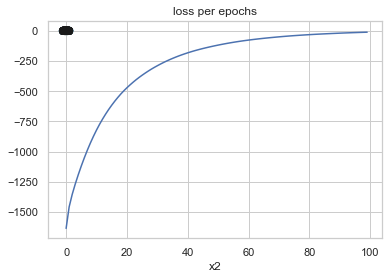

In [43]:
svm = SVMDualProblem(C=1.0, kernel='poly', degree=2)
svm.fit(X, y, lr=1e-3)
print(f"Train score: {svm.score(X, y)}")
svm.plot_decision_boundary()

## Kernel SVM on non-linear decision boundaries  

The decision boundary graph not generated well. See [video](https://youtu.be/eUlBWyazbuk?t=274).  

Generate dataset

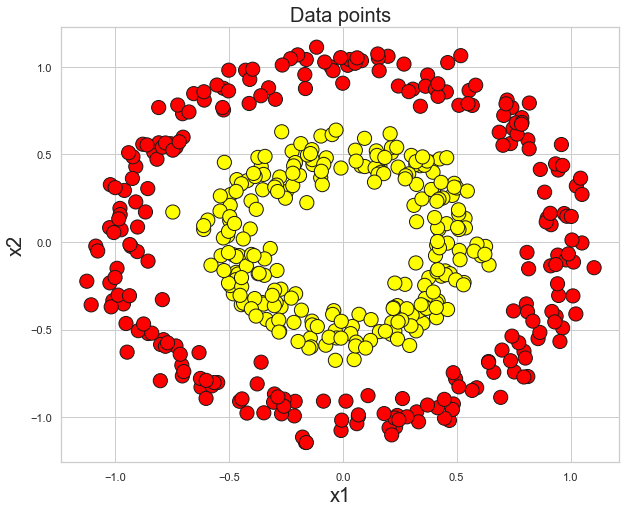

In [44]:
from sklearn.datasets import make_circles
X, y = make_circles(500, factor=0.5, noise=0.08)
y[y == 0] = -1

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=200, edgecolor='k', cmap='autumn')
plt.xlabel('x1', fontsize=20)
plt.ylabel('x2', fontsize=20)
plt.title('Data points', fontsize=20)
plt.show()

Train score: 1.0


C:\Users\GANESH~1\AppData\Local\Temp/ipykernel_252/2874791040.py:82: UserWarning: No contour levels were found within the data range.
  ax.contour(XX, YY, Z, colors=['b', 'g', 'r'], levels=[-1, 0, 1],


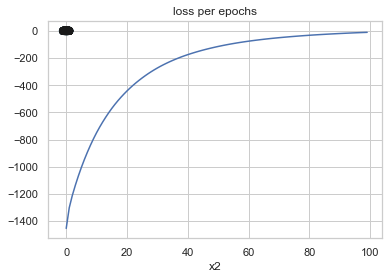

In [45]:
svm = SVMDualProblem(C=1.0, kernel='poly', degree=2)
svm.fit(X, y, lr=1e-3)
print(f"Train score: {svm.score(X, y)}")
svm.plot_decision_boundary()